In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
with open('BTC_USD_timeseries.json') as f:
    d = json.load(f)

In [15]:
# create a dataframe with columns: date, rate_close
date = []
rate = []  # BTC-to-USD
for data_row in d:
    date.append(data_row['time_period_end'].split('T')[0])
    rate.append(float(data_row['rate_close']))

In [16]:
df = pd.DataFrame({'date': date, 'rate': rate})

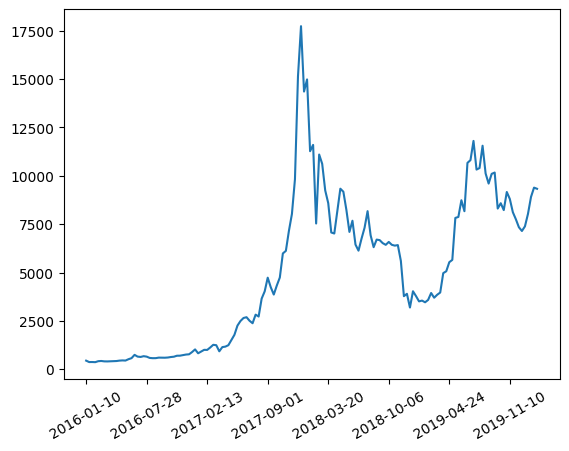

In [17]:
fig, ax = plt.subplots()
x = np.arange(len(df))
ax.plot(x, df['rate'])
ax.set_xticks(x[::20], df['date'][::20], rotation=30)
plt.show()

In [27]:
with open('BTC_USD_orderbook_latest.json') as f:
    orderbook = json.load(f)

# create a dataframe with columns: date, rate_close
price = []
volume = []
is_bid = []

for data_row in orderbook:
    for ask in data_row['asks']:
        price.append(ask['price'])
        volume.append(ask['size'])
        is_bid.append(False)
    for bid in data_row['bids']:
        price.append(bid['price'])
        volume.append(bid['size'])
        is_bid.append(True)
orderbook = pd.DataFrame({'price': price, 'volume': volume, 'is_bid': is_bid})

In [46]:
orderbook.sample(100)

,price,volume,is_bid,cum_volume
661,27481,0.100000,True,0
8669,27450,0.194758,True,0
8507,27488,0.250000,False,0
7266,27469,3.962167,True,0
1646,27560,0.800729,False,0
...,...,...,...,...
1625,27530,4.026500,False,0
9204,27483,0.281933,False,0
5895,27403,7.682218,True,0
5759,27476,1.697128,True,0


In [43]:
def _get_cum_volume(orderbook):
    orderbook['cum_volume'] = 0
    # bid
    orderbook = orderbook.sort_values('price', ascending=False).reset_index(drop=True)
    bid_index = orderbook[orderbook['is_bid'] == True].index
    orderbook.loc[bid_index, 'cum_volume'] = orderbook.loc[bid_index]['volume'].cumsum()
    # ask
    orderbook = orderbook.sort_values('price', ascending=True).reset_index(drop=True)
    ask_index = orderbook[orderbook['is_bid'] == False].index
    orderbook.loc[ask_index, 'cum_volume'] = orderbook.loc[ask_index]['volume'].cumsum()
    return orderbook

def plot_orderbook(orderbook):
    orderbook = _get_cum_volume(orderbook)
    fig, ax = plt.subplots()
    bids = orderbook[orderbook['is_bid'] == True]
    ax.step(bids['price'], bids['cum_volume'], label='bid')
    asks = orderbook[orderbook['is_bid'] == False]
    ax.step(asks['price'], asks['cum_volume'], label='ask')
    ax.legend()
    ax.set_xlabel('price [USD]')
    ax.set_ylabel('volume')
    plt.show()

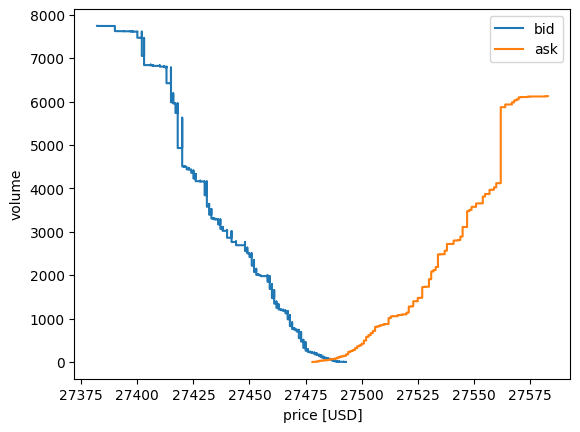

In [44]:
plot_orderbook(orderbook)